<a href="https://colab.research.google.com/github/ArulGilbert/Deep-Learning-with-Pytorch/blob/main/DeepLearning_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deeplearning using Pytorch

- First we'll look at Lists, numpy and Tensor(along with tensor operations)
- Create a simple Neural Network using Iris Dataset
- Work on a Convolution Neural Network using MNIST dataset

## Tensors
- A torch Tensor is a multi-dimensional matrix containing elements of a single data type.
- Similar to Numpy Arrays, but full fun things that make them work better on GPUs
- default data type of float32
- More suitable for deep learning than a numpy array

In [ ]:
 import torch
 import numpy as np

## Lists

In [ ]:
my_list  = [[1,2,3,4,5],[6,7,8,9,10]]
my_list

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

## Numpy Arrays

In [ ]:
np1 = np.random.rand(3,4)
np1

array([[0.17155732, 0.65707686, 0.07295952, 0.00083608],
       [0.58311328, 0.61233365, 0.56710878, 0.4472358 ],
       [0.6312331 , 0.26207127, 0.46788005, 0.69006777]])

In [ ]:
np1.dtype

dtype('float64')

## Tensors

In [ ]:
tensor_2d = torch.randn(3,4)
tensor_2d

tensor([[-0.5503,  0.8747,  0.1631, -0.0218],
        [ 0.3507, -0.1909,  0.7268,  0.3448],
        [-0.9576, -1.3546, -0.0861, -1.2124]])

In [ ]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
## Create tensor out of numpy array
my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.1716, 0.6571, 0.0730, 0.0008],
        [0.5831, 0.6123, 0.5671, 0.4472],
        [0.6312, 0.2621, 0.4679, 0.6901]], dtype=torch.float64)

# Tensor Operations

In [ ]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Reshape and View
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
# Reshape if we dont know the number of items using -1
my_torch2 = torch.arange(10)
my_torch2 = my_torch2.reshape(2,-1)
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
my_torch3 = torch.arange(10).view(2,5)
my_torch3

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
#slices
my_torch4 = torch.arange(10)
my_torch4[:3]

tensor([0, 1, 2])

In [ ]:
my_torch5=my_torch4.reshape(5,2)
my_torch5[:,0]

tensor([0, 2, 4, 6, 8])

In [ ]:
my_torch5[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

## Tensor Math Operations

In [ ]:
tensor_a=torch.tensor([1,2,3,4])
tensor_b=torch.tensor([5,6,7,8])


In [ ]:
#Addition
#tensor_a + tensor_b

torch.add(tensor_a,tensor_b)

tensor([ 6,  8, 10, 12])

In [ ]:
#Subtraction
torch.subtract(tensor_b,tensor_a)

tensor([4, 4, 4, 4])

In [ ]:
#multiplication
torch.multiply(tensor_a,tensor_b)

tensor([ 5, 12, 21, 32])

In [ ]:
#division
torch.div(tensor_b,tensor_a)

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [ ]:
#Remainder
torch.remainder(tensor_b,tensor_a)

tensor([0, 0, 1, 0])

In [ ]:
#Exponent
torch.pow(tensor_b,tensor_a)

tensor([   5,   36,  343, 4096])

In [ ]:
#Reassignment_
#adding underscore after whatever_ will reassign the value
tensor_a.add_(tensor_b)

tensor([ 6,  8, 10, 12])

# Simple Neural Network
- we'll be using an iris dataset

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#create a model class that inherits nn.Module

class Model(nn.Module):
  #Input layer (4 feature of the flower) -->
  #Hidden layer1(number o neurons) -->
  #Hidden Layer2(number of neurons) -->
  #output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.module
    self.fc1 = nn.Linear(in_features, h1) #fc-->fully connected
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)

#create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
#Changed last columns from strings to integer
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
#Train test Split!
X = my_df.drop('variety', axis =1)
y=my_df['variety']

In [8]:
#Convert these to numpy arrays
X = X.values
y = y.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [10]:
#Convert X and y features and labels to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

X_train.shape

torch.Size([120, 4])

In [11]:
# Set the criterion of model to measure the error, how far off the prodiction are from the data
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, learning rate lr (if the error doesnt go down as we learn after a bunch of iterations(epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# the lower your learning rate the longer its going to take for the model to run


In [12]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [13]:
# Train our model
#Epochs (one run thru all the training data in our network)
epochs = 100
losses=[]
for i in range(epochs):
  #Go Forward and get a prediction!
  y_pred = model.forward(X_train) # Get predicted results

  #Measure the loss/error, gonna be hight at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the network to dine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epochs')

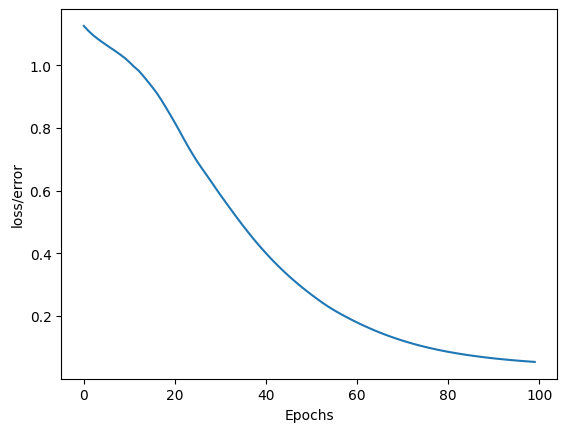

In [14]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")


In [15]:
# Evaluate Model on Test Data set(validate model on test set)\
correct = 0
with torch.no_grad(): #Basically turn off back propogation
  for i, data in enumerate(X_test):
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)

    #will tell us what type of flower class our network think it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
        correct +=1

print(f'We got {correct} correct!')


1.) tensor([[-5.8771,  4.4629,  6.5155],
        [-7.5451,  4.1668,  9.7293],
        [-8.4517,  5.1275, 10.2015],
        [-4.3411,  5.6280,  2.5636],
        [-7.1838,  4.8757,  8.3024],
        [-3.3940,  5.3421,  1.2802],
        [-5.9240,  4.9826,  6.0025],
        [-4.2895,  5.7016,  2.3920],
        [-6.5369,  4.9261,  7.1291],
        [-8.0526,  4.4129, 10.3325],
        [-5.6775,  4.9505,  5.6248],
        [ 4.5748, -2.2579, -2.8925],
        [ 4.2646, -2.0055, -2.7342],
        [-2.1081,  4.0482,  0.5803],
        [ 3.4608, -1.2147, -2.3488],
        [-5.4739,  5.1174,  5.0966],
        [ 4.0637, -1.8045, -2.6504],
        [-5.8090,  4.6057,  6.2494],
        [ 4.9250, -2.5763, -3.0545],
        [ 3.4559, -1.2559, -2.3637],
        [-2.6161,  4.5584,  0.8575],
        [-7.7427,  4.7379,  9.4233],
        [ 3.5776, -1.3269, -2.4109],
        [ 4.5445, -2.2478, -2.8698],
        [-2.6548,  4.6138,  0.8825],
        [-3.2832,  5.2189,  1.2163],
        [-4.6527,  5.7790,  2.9302

### Evaluate New data on the Network

In [19]:
new_iris = torch.tensor([5.9,3.0,5.3,1.8])

In [20]:
with torch.no_grad():
  print(model(new_iris))


tensor([-6.2973,  4.3005,  7.4432])


### Save and Load our Neural network model!

In [21]:
#This will save all our weights and biases in our model into a dictionary and save
#make sure to save it as .pt
torch.save(model.state_dict(), 'iris_model.pt')

In [22]:
# Load the saved model
new_model = Model()
#now lets load in all weights and biases
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [23]:
# Make sure it is loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## Convolution Neural Network
- We'll use the MNIST dataset

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Convert MNIST Image files into a Tensor of 4Dimensions (No. of images, height, width, color channels)

transform = transforms.ToTensor()

In [55]:
# Train Data
train_data = datasets.MNIST(root = '/cnn_data', train = True, download=True, transform = transform)


In [56]:
# Test Data
test_data = datasets.MNIST(root = '/cnn_data', train = False, download=True, transform = transform)


In [57]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [58]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [59]:
# Create a small batch size for images... let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [60]:
#Define our CNN model
#Desribe convolutional layer and what its doing(2 convolution layers)
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)


In [61]:
#Grab 1 MNIST record
for i, (X_train, y_train) in enumerate(train_data):
  break

X_train.shape

torch.Size([1, 28, 28])

In [62]:
X = X_train.view(1,1,28,28)

In [63]:
#Perform our first COnvolution
X = F.relu(conv1(X)) # Rectified Linear Unit for our activation function

In [64]:
# 1 single image, 6 is the filters we asked for, 26*26 because of padding it shrinks the columns and rows that has give no useful information
X.shape

torch.Size([1, 6, 26, 26])

In [65]:
# pass thru the pooling layer
x = F.max_pool2d(X,2,2) # kernal of 2 and stride of 2

In [66]:
x.shape # 26/2

torch.Size([1, 6, 13, 13])

In [67]:
# Our second convolutional layer
x = F.relu(conv2(x))

In [68]:
x.shape # Again, we didnt set padding so we lose 2 pixles aroung the outside of the image

torch.Size([1, 16, 11, 11])

In [69]:
# Pooling layer
x = F.max_pool2d(x,2,2)

In [70]:
# 11/2  = 5.5 but we have to round down, beacuse we can't invent data to round up
x.shape

torch.Size([1, 16, 5, 5])

### Here's the real deal!

In [76]:
# Model  Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    # Fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2) # 2x2 kernal and stride 2

    #Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2) # 2x2 kernal and stride 2

    # Re-view to flatten it out
    X = X.view(-1, 16*5*5) # negative one so that we can vary the batch size

    #Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)


In [77]:
# Create an Instance of our Model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model


ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [78]:
# Loss FUnction optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) # Smaller the learning rate, longer its gonna take to train


In [79]:
import time
start_time = time.time()

# create variables to track things... not necessary but what the hell...
epochs = 5
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flattend 2D
    loss = criterion(y_pred, y_train) # compare the prediction to the correct answers in the train

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions
    batch_corr = (predicted == y_train).sum() # how many we for correct fom this batch. True=1, False=0 sum those up
    trn_corr+=batch_corr # keep track as we go along in training

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b % 600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad(): # No gradient so we dont update our weights and biases with test
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0  Batch: 600  Loss: 0.1623610556125641
Epoch: 0  Batch: 1200  Loss: 0.1502392590045929
Epoch: 0  Batch: 1800  Loss: 0.4744560718536377
Epoch: 0  Batch: 2400  Loss: 0.14238706231117249
Epoch: 0  Batch: 3000  Loss: 0.007758188061416149
Epoch: 0  Batch: 3600  Loss: 0.3836284875869751
Epoch: 0  Batch: 4200  Loss: 0.0038223876617848873
Epoch: 0  Batch: 4800  Loss: 0.0021286322735249996
Epoch: 0  Batch: 5400  Loss: 0.0569545142352581
Epoch: 0  Batch: 6000  Loss: 0.00038789428072050214
Epoch: 1  Batch: 600  Loss: 0.005851339548826218
Epoch: 1  Batch: 1200  Loss: 0.3855525553226471
Epoch: 1  Batch: 1800  Loss: 0.004819948226213455
Epoch: 1  Batch: 2400  Loss: 0.003216963727027178
Epoch: 1  Batch: 3000  Loss: 0.0332382395863533
Epoch: 1  Batch: 3600  Loss: 0.5372857451438904
Epoch: 1  Batch: 4200  Loss: 0.04561494290828705
Epoch: 1  Batch: 4800  Loss: 0.0007510822033509612
Epoch: 1  Batch: 5400  Loss: 0.0001173773780465126
Epoch: 1  Batch: 6000  Loss: 0.14201366901397705
Epoch: 2  Batch

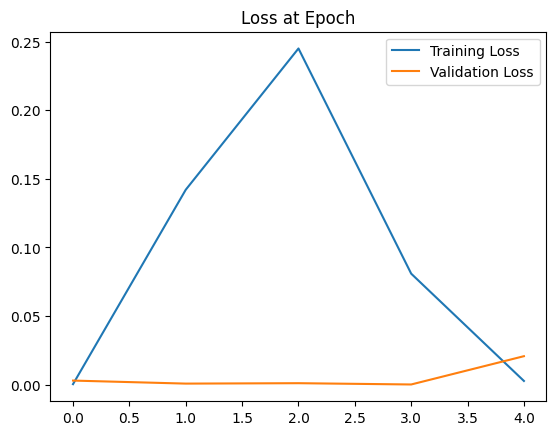

In [81]:
# Graph the loss at epochs
train_losses = [tl.item()  for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

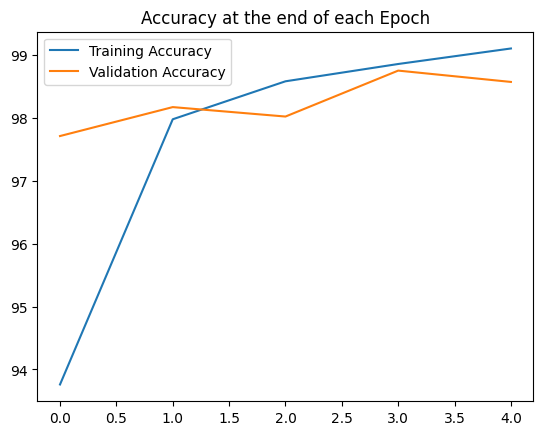

In [83]:
# Graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label = 'Training Accuracy')
plt.plot([t/100 for t in test_correct], label = 'Validation Accuracy')
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [84]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [85]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [88]:
# Did for correct
correct.item()/len(test_data)*100

98.57000000000001

#### If you want to try out an image with the given cnn

In [90]:
# Grab an Image
test_data[4128]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [91]:
test_data[4128][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

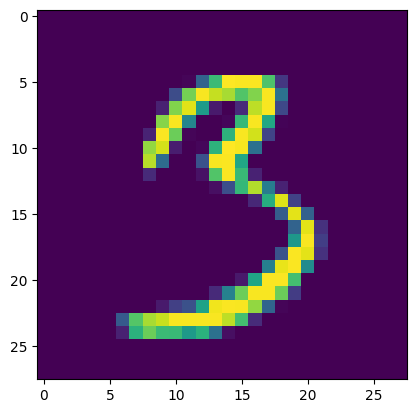

In [94]:
# The image test_data[4128]
plt.imshow(test_data[4128][0].reshape(28,28))

In [ ]:
# Pass the image into the model
mode.eval()
with torch.no_grad():
  new_prediction = model(test_data[4128][0].view(1,1,28,28)) #batch size of 1, 1 color channel, 28x28 image


In [ ]:
new_prediciton

In [ ]:
new_prediction.argmax()